In [2]:
!pip install datasets

   ---------------------------------------- 0.0/25.2 MB ? eta -:--:--
   --- ------------------------------------ 2.4/25.2 MB 11.4 MB/s eta 0:00:03
   ------- -------------------------------- 5.0/25.2 MB 12.0 MB/s eta 0:00:02
   ----------- ---------------------------- 7.3/25.2 MB 12.0 MB/s eta 0:00:02
   ---------------- ----------------------- 10.2/25.2 MB 12.1 MB/s eta 0:00:02
   -------------------- ------------------- 12.8/25.2 MB 12.2 MB/s eta 0:00:02
   ------------------------ --------------- 15.2/25.2 MB 12.2 MB/s eta 0:00:01
   ---------------------------- ----------- 18.1/25.2 MB 12.1 MB/s eta 0:00:01
   -------------------------------- ------- 20.4/25.2 MB 12.1 MB/s eta 0:00:01
   ------------------------------------ --- 22.8/25.2 MB 12.2 MB/s eta 0:00:01
   ---------------------------------------  25.2/25.2 MB 12.3 MB/s eta 0:00:01
   ---------------------------------------- 25.2/25.2 MB 11.5 MB/s eta 0:00:00


In [1]:
!pip install matplotlib

In [1]:
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

c:\Users\user\Desktop\PythonLearning\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [9]:
#iloc[row, columns]. pas in index. eg .iloc[0:10, 6]
df.iloc[:10, 1:3]

,job_title,job_location
0,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT"
1,Data Analyst,"Guadalajara, Jalisco, Mexico"
2,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany"
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX"
4,Data Engineer- Sr Jobs,"Washington, DC"
5,GCP Data Engineer,Anywhere
6,Senior Data Engineer - GCP Cloud,"Dearborn, MI"
7,Data Engineer,Anywhere
8,Technology & Operations Business Analyst,"Copenhagen, Denmark"
9,Data Scientist II,Anywhere


In [12]:
df.loc[:, 'salary_rate':'salary_hour_avg'].dropna(subset='salary_rate')  #Use the subset parameter to check specific columns

,salary_rate,salary_year_avg,salary_hour_avg
28,year,109500.0,NaN
43,hour,NaN,97.5
51,hour,NaN,72.5
77,year,140000.0,NaN
92,year,120000.0,NaN
...,...,...,...
785624,year,139216.0,NaN
785641,year,150000.0,NaN
785648,year,221875.0,NaN
785682,year,157500.0,NaN


In [4]:
df['salary_year_avg'].groupby(df['job_title_short']).median()

job_title_short
Business Analyst              85000.0
Cloud Engineer                90000.0
Data Analyst                  90000.0
Data Engineer                125000.0
Data Scientist               127500.0
Machine Learning Engineer    106415.0
Senior Data Analyst          111175.0
Senior Data Engineer         147500.0
Senior Data Scientist        155500.0
Software Engineer             99150.0
Name: salary_year_avg, dtype: float64

In [6]:
round(df['salary_hour_avg'] .groupby(df['job_title_short']).median(), 2)

job_title_short
Business Analyst             40.36
Cloud Engineer               40.00
Data Analyst                 32.62
Data Engineer                58.50
Data Scientist               47.50
Machine Learning Engineer    47.53
Senior Data Analyst          47.50
Senior Data Engineer         61.50
Senior Data Scientist        47.62
Software Engineer            47.56
Name: salary_hour_avg, dtype: float64

In [11]:
median_salary_year = df['salary_year_avg'].median()

In [12]:
median_salary_hour =  df['salary_hour_avg'].median()

In [16]:
df_filled = df
df_filled['salary_year_avg'] = df_filled['salary_year_avg'].fillna(median_salary_year)
df_filled['salary_hour_avg'] = df_filled['salary_hour_avg'].fillna(median_salary_hour)

In [18]:
df.loc[:10, 'salary_rate':'salary_hour_avg']

,salary_rate,salary_year_avg,salary_hour_avg
0,None,115000.0,45.98
1,None,115000.0,45.98
2,None,115000.0,45.98
3,None,115000.0,45.98
4,None,115000.0,45.98
5,None,115000.0,45.98
6,None,115000.0,45.98
7,None,115000.0,45.98
8,None,115000.0,45.98
9,None,115000.0,45.98


In [19]:
df_unique = df_filled
df_unique = df_unique.drop_duplicates(subset= ['job_title', 'company_name'] )  #using these columns because we do not want to drop a job title that may appear in another company. so dropping only duplicate postings from the same company
print('Length of original df:   ', len(df_filled))
print('Length of no duplicates df:   ', len(df_unique))
print('Rows dropped:   ', len(df_filled) - len(df_unique))

Length of original df:    785741
Length of no duplicates df:    508042
Rows dropped:    277699


In [20]:
df_unique

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,115000.0,45.98,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,115000.0,45.98,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,115000.0,45.98,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,115000.0,45.98,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,115000.0,45.98,Kristina Daniel,"['bash', 'python', 'oracle', 'aws', 'ansible',...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785735,Senior Data Engineer,Senior Data Engineer,"Berlin, Jerman",melalui Top County Careers,Pekerjaan tetap,False,Germany,2023-03-13 06:19:07,False,False,Germany,None,115000.0,45.98,Pure App,"['sql', 'python', 'bigquery', 'aws', 'airflow'...","{'cloud': ['bigquery', 'aws'], 'libraries': ['..."
785736,Software Engineer,DevOps Engineer,Singapura,melalui Trabajo.org,Pekerjaan tetap,False,Singapore,2023-03-13 06:16:16,False,False,Singapore,None,115000.0,45.98,CAREERSTAR INTERNATIONAL PTE. LTD.,"['bash', 'python', 'perl', 'linux', 'unix', 'k...","{'os': ['linux', 'unix'], 'other': ['kubernete..."
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,115000.0,45.98,HABA FAMILYGROUP,"['sas', 'sas', 'sql', 'excel']","{'analyst_tools': ['sas', 'excel'], 'programmi..."
785738,Business Analyst,Commercial Analyst - Start Now,Malaysia,melalui Ricebowl,Pekerjaan tetap,False,Malaysia,2023-03-12 06:32:36,False,False,Malaysia,None,115000.0,45.98,Lendlease Corporation,"['powerpoint', 'excel']","{'analyst_tools': ['powerpoint', 'excel']}"


In [ ]:
df.sample(10, random_state= 42) 
"""#to get random sample. use  random_state for reproducibility. df.sample(n=None, frac=None, replace=False, weights=None, random_state=None, axis=None).
n - Number of rows/columns to sample (default is 1).
fra - Fraction of rows/columns to sample (e.g., frac=0.5 means 50%).
replace - If True, allows sampling with replacement. Allows the same row to be selected multiple times.
weights - Specifies sampling probabilities for each row.
random_state - Sets a seed for reproducibility. Ensures the sample is always the same every time you run the code.
axis - 0 for rows (default), 1 for columns. default is 0"""

In [3]:
df_copied = df.copy()  #using the .copy() method ensures the original df is not altered like it is altered when you use df_copied = df and do some manipulation in df_copied

In [4]:
"""df.pivot_table(values, index, columns=None, aggfunc='mean', fill_value=None, margins=False)
values - The column(s) to aggregate (e.g., 'Sales').
index - The column(s) to group by (rows).
columns - The column(s) to create subcategories (optional).
aggfunc - The function used for aggregation (default is 'mean').
fill_value - Replaces missing values with a specified value.
margins - If True, adds row/column totals.

size counts all rows in a group(value/column not req)
count: counts all non-NA calues in each group(value/column req)"""

df.pivot_table(index= 'job_title_short', aggfunc= 'size')


job_title_short
Business Analyst              49063
Cloud Engineer                12331
Data Analyst                 196075
Data Engineer                186241
Data Scientist               172286
Machine Learning Engineer     14080
Senior Data Analyst           29216
Senior Data Engineer          44563
Senior Data Scientist         36957
Software Engineer             44929
dtype: int64

In [28]:
df.pivot_table(values= 'salary_year_avg', index= 'job_title_short', aggfunc= 'median')

,salary_year_avg
job_title_short,
Business Analyst,85000.0
Cloud Engineer,90000.0
Data Analyst,90000.0
Data Engineer,125000.0
Data Scientist,127500.0
Machine Learning Engineer,106415.0
Senior Data Analyst,111175.0
Senior Data Engineer,147500.0
Senior Data Scientist,155500.0


In [5]:
df.pivot_table(values= 'salary_year_avg', index= 'job_country', columns= 'job_title_short', aggfunc= 'median') #index is for rows and column is for columns

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_country,,,,,,,,,,
Albania,NaN,NaN,49950.00,NaN,69981.25,NaN,NaN,NaN,157500.0,NaN
Algeria,NaN,NaN,44100.00,45000.0,NaN,NaN,NaN,NaN,NaN,NaN
Argentina,71100.0,197500.0,92771.75,96773.0,71000.00,101029.0,NaN,147500.0,NaN,174500.0
Armenia,NaN,NaN,100500.00,48750.0,NaN,87021.0,NaN,NaN,NaN,NaN
Australia,70000.0,110000.0,109500.00,106712.5,139216.00,101029.0,50640.0,147500.0,157500.0,118350.0
...,...,...,...,...,...,...,...,...,...,...
Uruguay,NaN,NaN,100500.00,NaN,NaN,50000.0,NaN,NaN,57500.0,NaN
Uzbekistan,NaN,NaN,NaN,NaN,30750.00,NaN,NaN,NaN,NaN,NaN
Vietnam,79200.0,NaN,75550.00,96773.0,70000.00,57600.0,105837.5,147500.0,79200.0,53600.0


In [6]:
top_countries = df['job_country'].value_counts().head(6).index
top_countries

Index(['United States', 'India', 'United Kingdom', 'France', 'Germany',
       'Spain'],
      dtype='object', name='job_country')

In [7]:
df_job_country_salary = df.pivot_table(values= 'salary_year_avg', index= 'job_country', columns= 'job_title_short', aggfunc= 'median') 
df_job_top_countries_salary = df_job_country_salary.loc[top_countries]
df_job_top_countries_salary

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_country,,,,,,,,,,
United States,90000.0,116100.0,90000.0,125000.0,130000.0,150000.0,110000.0,150000.0,155000.0,130000.0
India,64800.0,NaN,100500.0,147500.0,114008.0,79200.0,111175.0,147500.0,149653.0,79200.0
United Kingdom,56700.0,NaN,87750.0,110000.0,105300.0,149653.0,111175.0,147500.0,157500.0,89100.0
France,89100.0,105968.0,69175.0,98301.5,88128.0,80850.0,111175.0,147500.0,157500.0,142500.0
Germany,89100.0,89100.0,103750.0,147500.0,131560.0,89100.0,111175.0,147500.0,157500.0,84975.0
Spain,86400.0,89100.0,91977.0,133000.0,88128.0,101029.0,111175.0,147500.0,157500.0,77050.0


In [8]:
df_top_jobs_for_top_cuntries = df_job_top_countries_salary[['Data Analyst', 'Data Engineer', 'Data Scientist']]
df_top_jobs_for_top_cuntries

job_title_short,Data Analyst,Data Engineer,Data Scientist
job_country,,,
United States,90000.0,125000.0,130000.0
India,100500.0,147500.0,114008.0
United Kingdom,87750.0,110000.0,105300.0
France,69175.0,98301.5,88128.0
Germany,103750.0,147500.0,131560.0
Spain,91977.0,133000.0,88128.0


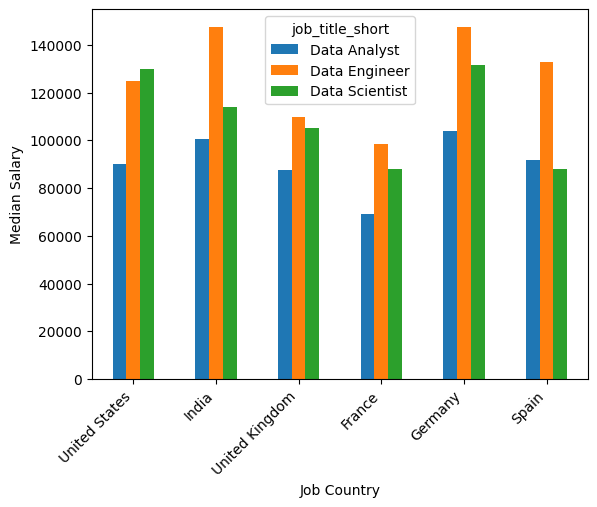

In [15]:
df_top_jobs_for_top_cuntries.plot(kind='bar')
plt.ylabel('Median Salary')
plt.xlabel('Job Country')
plt.xticks(rotation=45, ha= 'right')
plt.show()

In [ ]:
#rename an index
df_name.index.name = 'name_you_want'
df_name.index.dtype #to get the index type

In [24]:
df_usa = df[df['job_country'] == 'United States']
df_usa.index.name = 'job_index'
df_usa.reset_index(inplace= True)
df_usa

,job_index,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
2,5,Data Engineer,GCP Data Engineer,Anywhere,via ZipRecruiter,Contractor and Temp work,True,Georgia,2023-11-07 14:01:59,False,False,United States,None,NaN,NaN,smart folks inc,"['python', 'sql', 'gcp']","{'cloud': ['gcp'], 'programming': ['python', '..."
3,6,Senior Data Engineer,Senior Data Engineer - GCP Cloud,"Dearborn, MI",via LinkedIn,Full-time,False,"Florida, United States",2023-03-27 13:18:18,False,False,United States,None,NaN,NaN,"Miracle Software Systems, Inc","['sql', 'python', 'java', 'sql server', 'gcp',...","{'cloud': ['gcp', 'bigquery'], 'databases': ['..."
4,9,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,None,NaN,NaN,"Radwell International, LLC","['sql', 'python', 'r', 'mongodb', 'mongodb', '...","{'analyst_tools': ['excel'], 'cloud': ['azure'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206287,785673,Data Scientist,Asset Management Data Scientist,"New York, NY",via Trabajo.org,Full-time,False,"New York, United States",2023-10-16 06:01:53,True,False,United States,None,NaN,NaN,JPMorgan Chase & Co.,None,None
206288,785685,Data Analyst,Data Analyst,"Indianapolis, IN",via Trabajo.org,Full-time,False,"Illinois, United States",2023-07-16 06:01:27,True,False,United States,None,NaN,NaN,"Aara Technologies, Inc","['sql', 'excel']","{'analyst_tools': ['excel'], 'programming': ['..."
206289,785692,Data Scientist,Data Scientist- Hybrid Work Location,"Dayton, OH",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-04-21 06:02:31,False,True,United States,year,157500.0,NaN,Tenet3,"['python', 'matlab', 'r']","{'programming': ['python', 'matlab', 'r']}"
206290,785703,Data Analyst,Data Analyst - CRYPTOGRAPHY - Full-time,Anywhere,via Snagajob,Full-time,True,"Texas, United States",2023-01-28 06:02:55,True,False,United States,None,NaN,NaN,Axelon Services Corporation,None,None


In [ ]:
df_usa.set_index('job_index', inplace=True)  #see that the initial index column is gone. so remember data is lost when this method is used
df_usa

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
job_index,,,,,,,,,,,,,,,,,
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
5,Data Engineer,GCP Data Engineer,Anywhere,via ZipRecruiter,Contractor and Temp work,True,Georgia,2023-11-07 14:01:59,False,False,United States,None,NaN,NaN,smart folks inc,"['python', 'sql', 'gcp']","{'cloud': ['gcp'], 'programming': ['python', '..."
6,Senior Data Engineer,Senior Data Engineer - GCP Cloud,"Dearborn, MI",via LinkedIn,Full-time,False,"Florida, United States",2023-03-27 13:18:18,False,False,United States,None,NaN,NaN,"Miracle Software Systems, Inc","['sql', 'python', 'java', 'sql server', 'gcp',...","{'cloud': ['gcp', 'bigquery'], 'databases': ['..."
9,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,None,NaN,NaN,"Radwell International, LLC","['sql', 'python', 'r', 'mongodb', 'mongodb', '...","{'analyst_tools': ['excel'], 'cloud': ['azure'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785673,Data Scientist,Asset Management Data Scientist,"New York, NY",via Trabajo.org,Full-time,False,"New York, United States",2023-10-16 06:01:53,True,False,United States,None,NaN,NaN,JPMorgan Chase & Co.,None,None
785685,Data Analyst,Data Analyst,"Indianapolis, IN",via Trabajo.org,Full-time,False,"Illinois, United States",2023-07-16 06:01:27,True,False,United States,None,NaN,NaN,"Aara Technologies, Inc","['sql', 'excel']","{'analyst_tools': ['excel'], 'programming': ['..."
785692,Data Scientist,Data Scientist- Hybrid Work Location,"Dayton, OH",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-04-21 06:02:31,False,True,United States,year,157500.0,NaN,Tenet3,"['python', 'matlab', 'r']","{'programming': ['python', 'matlab', 'r']}"


In [ ]:
df_name.sort_index(by=('median', 'salary_year_avg'), ascending= False)  #can be used when pivoting or groupinng data. ascedning is true by default